### Predict wine quality with Bayesian Linear Regression
*March 2025*

Recall Bayesian Linear Regression working principle:

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

I/ Load datasets

In [3]:
red_wine = pd.read_csv("winequality-red.csv")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
white_wine = pd.read_csv("winequality-white.csv", sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


II/ White wine

Train with class as label instead of quality

In [17]:
white_wine["Class"] = 1
filter_bad = white_wine.quality <= 3
filter_good = white_wine.quality >= 8
white_wine.loc[filter_bad,["Class"]] = 0
white_wine.loc[filter_good,["Class"]] = 2

y = white_wine.Class
X = white_wine.drop(["quality", "Class"], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

Mean Squared Error: 0.0389
R² Score: 0.0254


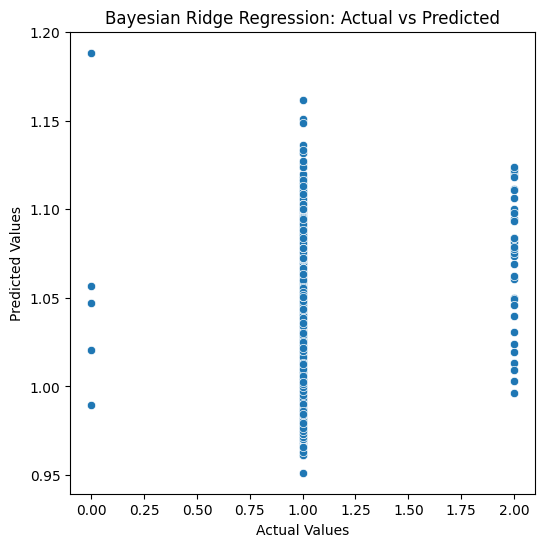

In [31]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bayesian Ridge Regression: Actual vs Predicted")
plt.show()

In [33]:
accuracy = accuracy_score(np.round(y_test).astype(int), np.round(y_pred).astype(int))
accuracy

0.9591836734693877

In [35]:
conf_matrix = confusion_matrix(np.round(y_test).astype(int), np.round(y_pred).astype(int))
conf_matrix

array([[  0,   5,   0],
       [  0, 940,   0],
       [  0,  35,   0]], dtype=int64)

Train directly on quality and then classify predictions

In [41]:
y = white_wine.quality
X = white_wine.drop(["quality"], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

Mean Squared Error: 0.4337
R² Score: 0.4401


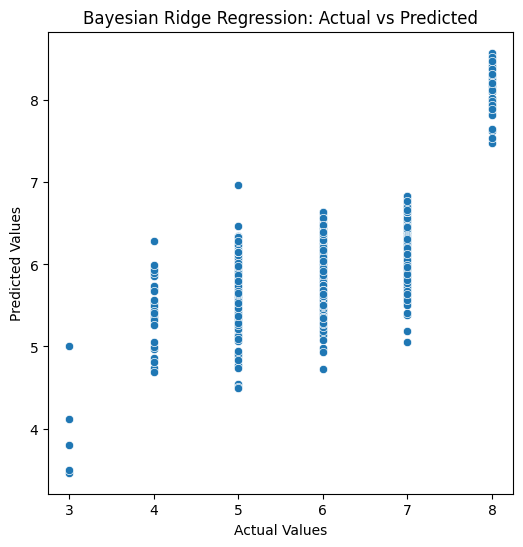

In [44]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bayesian Ridge Regression: Actual vs Predicted")
plt.show()

In [47]:
y_pred = np.round(y_pred).astype(int)
y_test = np.round(y_test).astype(int)
y_pred[y_pred <= 3] = 0
y_pred[y_pred >= 8] = 2
y_pred[(y_pred > 3) & (y_pred < 8)] = 1
y_test[y_test <= 3] = 0
y_test[y_test >= 8] = 2
y_test[(y_test > 3) & (y_test < 8)] = 1

In [48]:
accuracy = accuracy_score(np.round(y_test).astype(int), np.round(y_pred).astype(int))
accuracy

0.9959183673469387

In [49]:
conf_matrix = confusion_matrix(np.round(y_test).astype(int), np.round(y_pred).astype(int))
conf_matrix

array([[  2,   3,   0],
       [  0, 940,   0],
       [  0,   1,  34]], dtype=int64)

How to fairly evaluate the accuracy? Cross-validation?